# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy import stats


In [2]:
data_train=pd.read_csv('Training Data.csv')
data_test=pd.read_csv('Testing Data.csv')


EDA

In [3]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data_train.shape

(614, 13)

In [7]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data cleaning and data preparation

Seperating the numerical and object datatype variables

In [8]:
numerical=[var for var in data_train if data_train[var].dtype!='O']
object_var=[var for var in data_train if data_train[var].dtype=='O']

In [9]:
object_var

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Calculating the total number of Nan values in each column

In [11]:
data_train[object_var].isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [12]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
data_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
data_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Imputing the Nan values with mode value for categorical variables

In [15]:
def impute_cat_nan(data,cat):
  for feature in cat:
    data[feature].fillna(data[feature].mode()[0],inplace=True)

In [16]:
impute_cat_nan(data_train,object_var)

In [17]:
data_train[object_var].isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [18]:
data_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Finding outliers if present

In [19]:
def data_clean(data):
  for feature in numerical:
      sns.boxplot(data[feature])
      plt.title(feature)
      plt.figure(figsize=(10,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

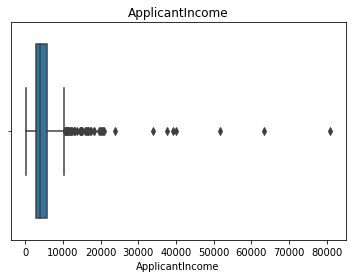

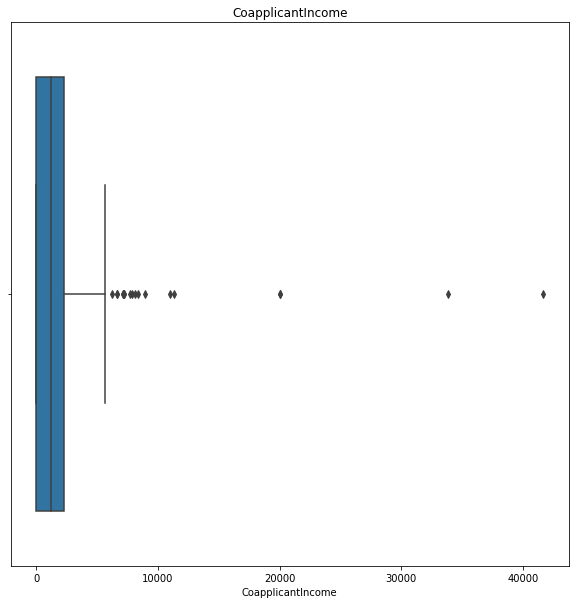

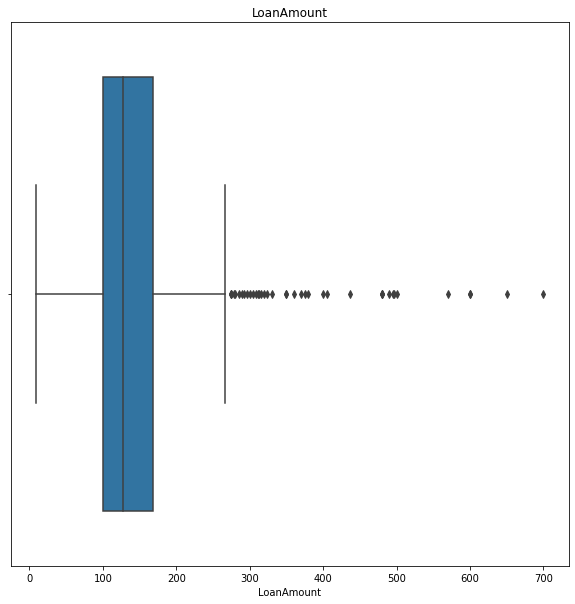

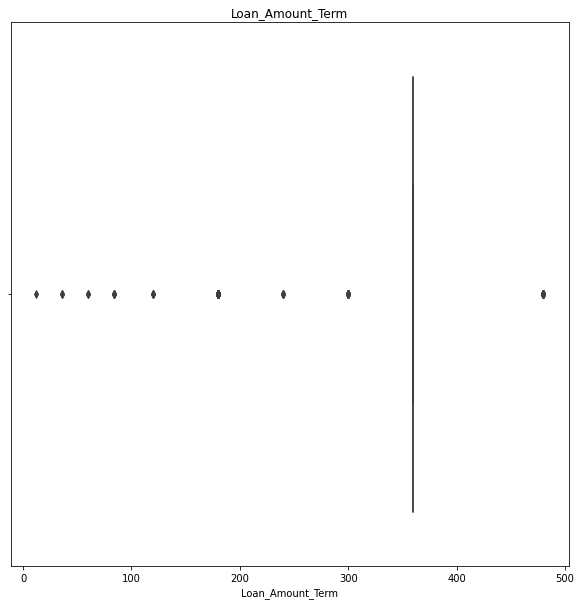

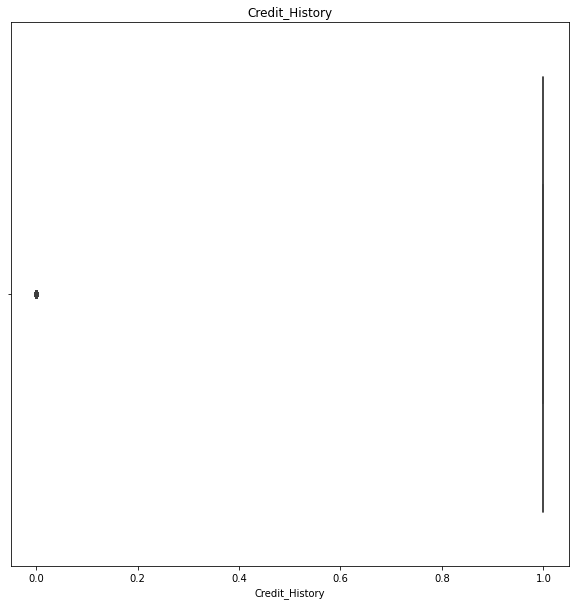

<Figure size 720x720 with 0 Axes>

In [20]:
data_clean(data_train)

In [21]:
data_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
data_train['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [23]:
#Distribution of Loan_Amount_Term.
#The red colored distribution is of median of the 
#distribution of Loan_Amount_Term

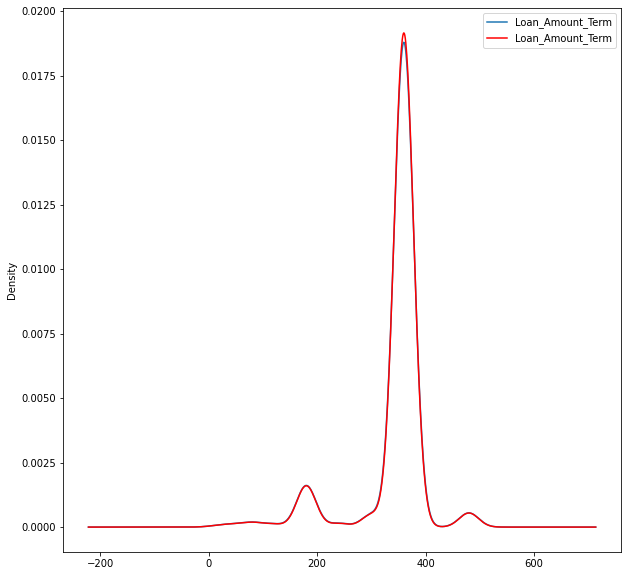

In [24]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
data_train['Loan_Amount_Term'].plot(kind='kde')
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].median()).plot(kind='kde',color='red')
ax.get_legend_handles_labels()
ax.legend()

In [25]:
#The red colored diatribution is the mode of distribution

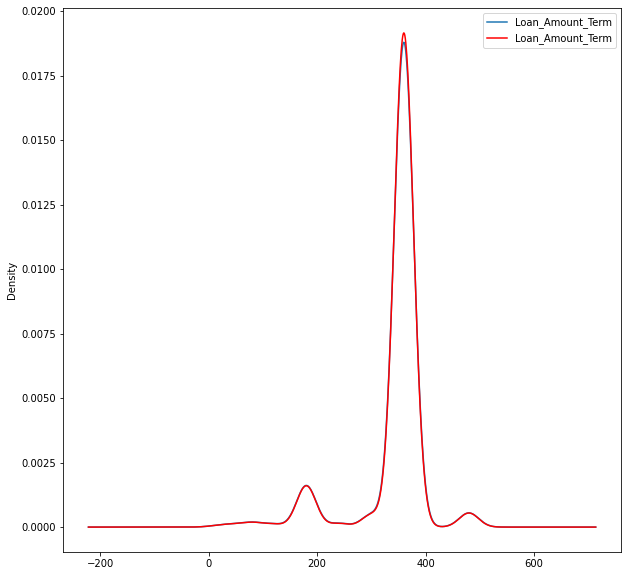

In [26]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
data_train['Loan_Amount_Term'].plot(kind='kde')
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0]).plot(kind='kde',color='red')
ax.get_legend_handles_labels()
ax.legend()

Distribution of Loan_Amount_Term has not much effect on distribution when median or mode is imputed so we can impute median in place of Nan as there are outliers present

In [27]:

data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0],inplace=True)


In [28]:
data_train[numerical].isnull().sum()


ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
dtype: int64

In [29]:
data_train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [30]:
#The red colored distribution is the median of distribution of LoanAmount

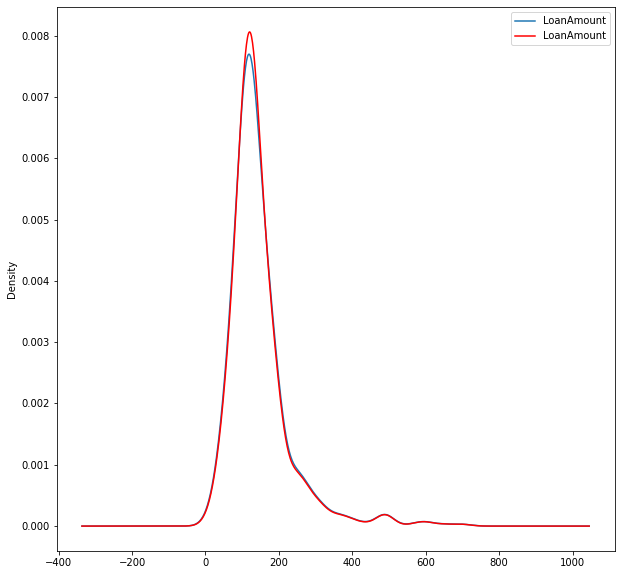

In [31]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
data_train['LoanAmount'].plot(kind='kde')
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median()).plot(kind='kde',color='red')
ax.get_legend_handles_labels()
ax.legend()

In [32]:
#The red colored distribution is the mean of distribution of LoanAmount

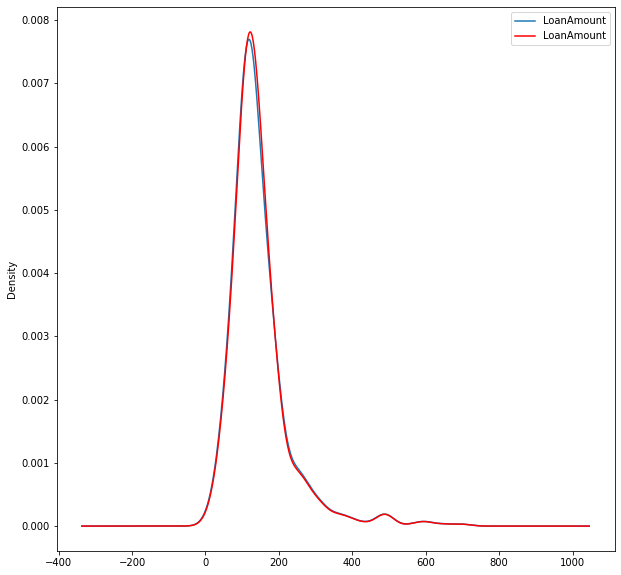

In [33]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
data_train['LoanAmount'].plot(kind='kde')
data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean()).plot(kind='kde',color='red')
ax.get_legend_handles_labels()
ax.legend()

Conclusion: Distribution of LoanAmount differs little more than its original distribution when we impute median in Nan values as compared to mean so we can impute mean value in place of Nan

In [34]:
data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean(),inplace=True)

In [35]:
#The red colored distribution is the median of distribution of Credit_History

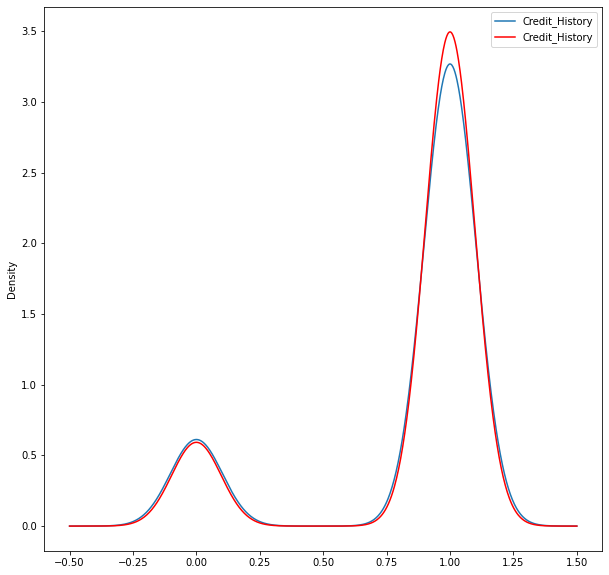

In [36]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
data_train['Credit_History'].plot(kind='kde')
data_train['Credit_History'].fillna(data_train['Credit_History'].median()).plot(kind='kde',color='red')
ax.get_legend_handles_labels()
ax.legend()

In [37]:
#The red colored distribution is the mode of distribution of Credit_History

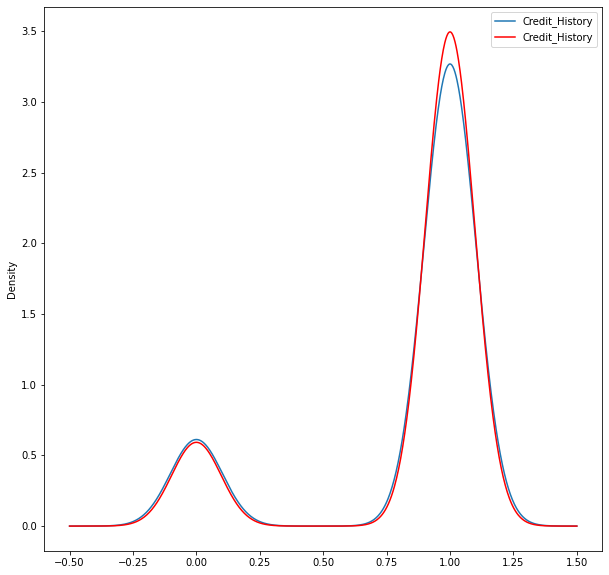

In [38]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
data_train['Credit_History'].plot(kind='kde')
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0]).plot(kind='kde',color='red')
ax.get_legend_handles_labels()
ax.legend()

Distribution of Credit_History does not differs much when we impute mode in Nan values as compared to median so we can impute mode value in place of Nan

In [39]:
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0],inplace=True)

In [40]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Removing the '+' in Dependents

In [41]:
data_train['Dependents']=data_train['Dependents'].str.strip('+')
data_train['Dependents']=data_train['Dependents'].astype('int')

In [42]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# Applying for test data

In [43]:
numerical=[var for var in data_test if data_test[var].dtype!='O'] 
object_var=[var for var in data_test if data_test[var].dtype=='O']

def impute_cat_nan(data,cat): 
  for feature in cat: 
    data[feature].fillna(data[feature].mode()[0],inplace=True) 
impute_cat_nan(data_test,object_var)

data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0],inplace=True)

data_test['LoanAmount'].fillna(data_test['LoanAmount'].mean(),inplace=True)

data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0],inplace=True)

data_test['Dependents']=data_test['Dependents'].str.strip('+')

data_test['Dependents']=data_test['Dependents'].astype('int')




In [44]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


# Feature engg

In [45]:
final_ds=pd.concat([data_train,data_test])

In [46]:
final_ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777.0,113.000000,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.000000,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.000000,360.0,1.0,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.000000,360.0,1.0,Rural,NaN


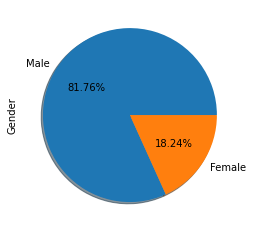

In [47]:

data_train['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)

plt.grid()

The ratio of male to female is  8:2
i.e There are almost 80% of male and 20% of female

In [48]:
data_train.shape

(614, 13)

In [49]:
data_test.shape

(367, 12)

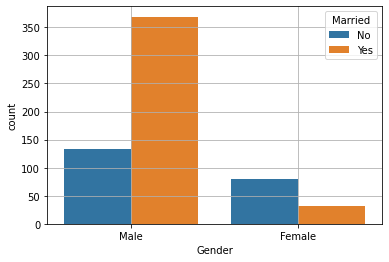

In [50]:



sns.countplot(x='Gender',hue='Married',data=data_train)
plt.grid()

The number of unmarried males are less than married males
The number of unmarried males are between 100 to 150
and married males are above 350

The number of unmarried females are more than married females.The number of unmarried females are approx 70 i.e between 50 to 100 and married females are between 0 to 50 approx 30

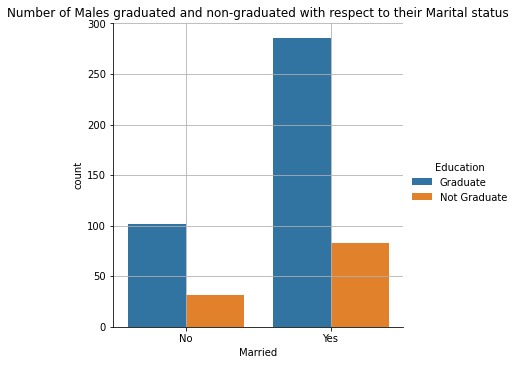

In [51]:
#For males
sns.catplot(x='Married',hue='Education',data=data_train[data_train['Gender']=='Male'],kind='count')
plt.title('Number of Males graduated and non-graduated with respect to their Marital status')
plt.grid()

The males who are  graduated and not married are approx 101 i.e between 100 to 150 and the number of males who are not graduated and not married are approx 20 or 30 i.e between 0 to 50

The males who are  graduated and  married are between 250 to 300 approx 270 and the number of males who are not graduated and married are approx 70 i.e between 50  to 100


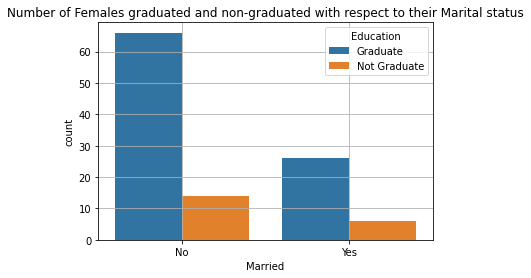

In [52]:
#For females
sns.countplot(x='Married',hue='Education',data=data_train[data_train['Gender']=='Female'])
plt.title('Number of Females graduated and non-graduated with respect to their Marital status')
plt.grid()

The females who are  graduated and not married are above 60 and the number of females who are not graduated and not married are approx 13 i.e between 10 to 20

The females who are  graduated and  married are  approx 27 i.e between 20 to 30 and the number of females who are not graduated and married are approx 5 or 6 i.e between 0 to 10


Education column will require label encoding as here the order  matters .We can assign Graduate as 1 and Not Graduate as 0

In [53]:

data_train[data_train['LoanAmount']==data_train['LoanAmount'].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


In [54]:

data_train[data_train['LoanAmount']==data_train['LoanAmount'].max()]['Gender']

171    Male
Name: Gender, dtype: object

 Male has the highest loan amount which is 700 Rs 

In [55]:
#the specification and information about the applicant who has the highest income

In [56]:
data_train[data_train['ApplicantIncome']==data_train['ApplicantIncome'].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


The applicant who has highest income i.e 81000 has Loan_ID:LP002317	and the applicant is male who is married with 3 dependents and he is graduated,not self_employed and has no loan status

In [57]:
#We can use labelencoding for gender column to convert it into  numeric form for Gender,Married,Self-Employed
#Education,Property_Area,Loan_Status
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data_train['Gender']=l.fit_transform(data_train['Gender'])
data_train['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [58]:
data_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [59]:
data_train['Married']=l.fit_transform(data_train['Married'])
data_train['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [60]:
data_train['Education']=data_train['Education'].map({'Graduate':1,'Not Graduate':0})

In [61]:
data_train['Self_Employed'].value_counts()
data_train['Self_Employed']=l.fit_transform(data_train['Self_Employed'])

In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [63]:
data_train['Property_Area']=data_train['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
data_train['Loan_Status'].value_counts()
data_train['Loan_Status']=l.fit_transform(data_train['Loan_Status'])

In [64]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


# Applying for test data

In [66]:
from sklearn.preprocessing import LabelEncoder 
l=LabelEncoder() 
data_test['Gender']=l.fit_transform(data_test['Gender']) 
data_test['Married']=l.fit_transform(data_test['Married']) 
data_test['Education']=data_test['Education'].map({'Graduate':1,'Not Graduate':0}) 
data_test['Self_Employed']=l.fit_transform(data_test['Self_Employed']) 
data_test['Property_Area']=data_test['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}) 

In [67]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [68]:
data_train['Loan_Status'].dtype

dtype('int64')

In [69]:
final_ds=pd.concat([data_train,data_test])

'Loan_ID' has no effect on dependent variable so we can drop that column

In [70]:
data_train.drop('Loan_ID',axis=1,inplace=True)
data_test.drop('Loan_ID',axis=1,inplace=True)

In [71]:
data_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [72]:
#Seperating dependent and independent features
x=data_train.drop('Loan_Status',axis=1)
Y=data_train['Loan_Status']

In [73]:
data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [74]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Feature Selection

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
enc=ExtraTreesClassifier()
enc.fit(x,Y)


ExtraTreesClassifier()

In [76]:
enc.feature_importances_

array([0.01977246, 0.01841593, 0.05510453, 0.02181815, 0.02118179,
       0.18463206, 0.12091377, 0.18083879, 0.04748123, 0.27927516,
       0.05056613])

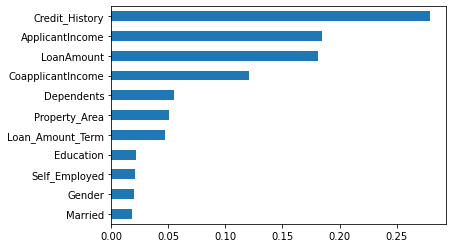

In [77]:
pd.Series(enc.feature_importances_,index=x.columns).sort_values(ascending=True).plot(kind='barh')

ExtraTreesClassifier gives a score for each feature of the data,the higher the score means more relevant the feature is

As from above fig we can conclude that the married,self_employed,education feature have very less score as compared to other feature

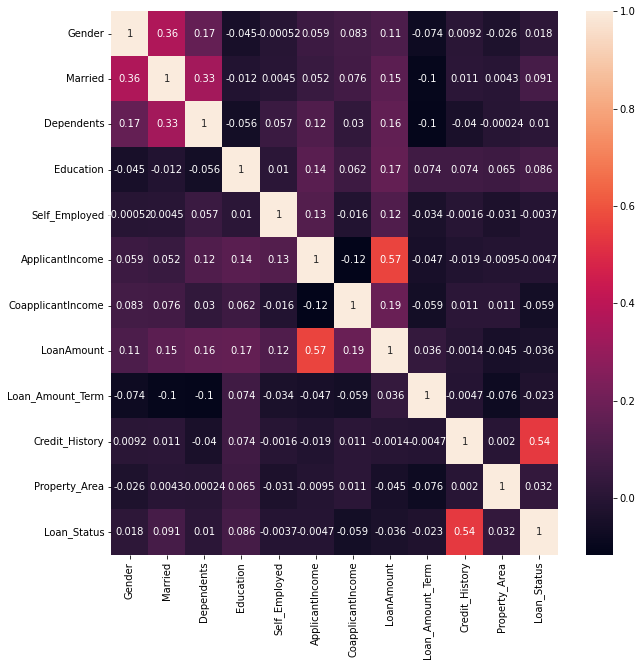

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr(),annot=True)

In [79]:
from sklearn.feature_selection import mutual_info_classif
m=mutual_info_classif(x,Y)
mutual=pd.Series(m,index=x.columns)
mutual.sort_values(ascending=False)

Credit_History       0.162794
Married              0.017397
ApplicantIncome      0.007720
Self_Employed        0.007626
Property_Area        0.003727
Education            0.001784
Loan_Amount_Term     0.000000
LoanAmount           0.000000
CoapplicantIncome    0.000000
Dependents           0.000000
Gender               0.000000
dtype: float64

From mutual_info_classif technique of feature selection we can  conclude that the Gender does not give much information about the target variable

From ExtraTreesClassifier and mutual_info_classif technique of feature selection we conclude that the features Gender,Self_Employed have less score i.e they are less relevent features so we can drop them

In [80]:
data_train.drop(['Gender','Self_Employed'],axis=1,inplace=True)
data_test.drop(['Gender','Self_Employed'],axis=1,inplace=True)

In [81]:
data_train

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,2900,0.0,71.000000,360.0,1.0,0,1
610,1,3,1,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,8072,240.0,253.000000,360.0,1.0,2,1
612,1,2,1,7583,0.0,187.000000,360.0,1.0,2,1


# Splitting dataset into training and testing

In [82]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=38)
for train_index,test_index in kf.split(x,Y):
      #print("\n{} of kfold {}".format(i,kf.n_splits))
      x_train,x_test=x.loc[train_index],x.loc[test_index]
      y_train,y_test=Y.loc[train_index],Y.loc[test_index]

# Feature Scaling

In [83]:

from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train_sc=s.fit_transform(x_train)
x_test_sc=s.transform(x_test)

#Model Selection

In [84]:
classifier_l=LogisticRegression()
classifier_l.fit(x_train_sc,y_train)
y_pred_l=classifier_l.predict(x_test_sc)

In [85]:
accuracy_score(y_test,y_pred_l)

0.875

In [86]:
confusion_matrix(y_test,y_pred_l)

array([[ 3,  2],
       [ 0, 11]])

From confusion matrix we can conclude that using LogisticRegression we get 2 False negative  and 0 False positive

In [87]:
data_test.isnull().sum()

Married              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Hyperparameter tuning 

In [88]:
#For RandomForest 

In [89]:
n_estimators=[int(x) for x in np.linspace(100,1500,15)]
max_features=[int(x) for x in np.linspace(1,30,6)]

max_depth=[2,3,4,6]
min_samples_split = [2, 4,5,6,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,4,6,7]
criterion=['gini','entropy']

In [90]:
param={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion,
    'max_depth':max_depth}
    

In [91]:
rf=RandomForestClassifier()

In [92]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=rf,n_jobs=-1,param_distributions=param,verbose=2)
random.fit(x_train_sc,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 6],
                                        'max_features': [1, 6, 12, 18, 24, 30],
                                        'min_samples_leaf': [1, 2, 4, 6, 7],
                                        'min_samples_split': [2, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   verbose=2)

In [93]:
random.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [94]:
y_pred_random=random.predict(x_test_sc)

In [95]:
accuracy_score(y_test,y_pred_random)

0.8125

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',
 max_depth= 3,
 max_features= 6,
 min_samples_leaf= 2,
 min_samples_split= 7,
 n_estimators= 1300)

In [97]:
rf.fit(x_train_sc,y_train)
y_pred_rf=rf.predict(x_test_sc)
accuracy_score(y_test,y_pred_rf)

0.8125

In [98]:
classification_report(y_test,y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      0.40      0.57         5\n           1       0.79      1.00      0.88        11\n\n    accuracy                           0.81        16\n   macro avg       0.89      0.70      0.73        16\nweighted avg       0.85      0.81      0.78        16\n'

In [99]:
confusion_matrix(y_test,y_pred_rf)

array([[ 2,  3],
       [ 0, 11]])

From confusion matrix we can conclude that using RandomForestClassifier we get 3 False negative  and 0 False positive

From above result logistic regression have high accuracy i.e. 87% as compared to Random forest which gives accuracy as 81% also in logistic regression the number of false negatives are less as compred to random forest classifier

So I will choose Logistic Regression as it gives good accuracy and has less type 2 error  

# Comparing actual and predicted result

In [100]:


result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_l})

In [101]:
result

,Actual,Predicted
596,0,1
597,0,0
600,0,0
601,1,1
602,1,1
603,1,1
604,1,1
605,0,1
606,1,1
607,1,1


The model is  performing good.The result of test and train data is almost matching

In [102]:

#The accuracy of model is 87%

In [103]:

#We can try the advanced optimization techniques like Bayesian optimization,Hyperoptuna etc

In [104]:
#Conclusion
#The person who has higher loanamount,coapplicant income their loan can be approved
#Credit_History is also very important variable as it is highly correlated
# with Loan_Status 

In [105]:
#making the prediction

In [106]:
q = np.array([[1,0,0,1,0,5849,0.0	,146.412162	,360.0	,1.0,2]])
prediction = classifier_l.predict(q)
print(prediction[0])

1


In [107]:
#The model gives correct prediction

In [108]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
598    1
599    1
Name: Loan_Status, Length: 598, dtype: int64

In [109]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
593,1,1,0,1,0,3859,3300.0,142.000000,180.0,1.0,0
594,1,1,0,1,1,16120,0.0,260.000000,360.0,1.0,2
595,1,0,0,0,0,3833,0.0,110.000000,360.0,1.0,0
598,1,1,0,1,1,9963,0.0,180.000000,360.0,1.0,0
